In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error


In [67]:
df = pd.read_csv('C:/Users/Sfundesihle/Downloads/mortgage-status.csv')

In [66]:
df.head(5)

,FIRST_NAME,LAST_NAME,Combo Name,DEPARTMENT,JOB_TITLE,ELECTED_OFFICIAL,DATE_STARTED,SEX,ETHNICITY,ORIG_START,DATE_TERM,PAY_STATUS,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY,Unnamed: 17
0,CATHERINE,ABALO,"ABALO, CATHERINE",Kane Regional Centers,NURSING ASSISTANT,0,2010-04-08,F,Black,7/6/2009,NaN,Active,"41,581.07","40,740.50","23,416.98",125.00,64282.48,NaN
1,KEVIN J,ABBOTT,"ABBOTT, KEVIN J",Emergency Management,FIRE INSTRUCTOR - PART TIME,0,2018-06-11,M,White (Not of Hispanic Origin),6/11/2018,NaN,Active,"30,576.00",378.00,-,-,378.00,NaN
2,JOY M,ABBOTT,"ABBOTT, JOY M",Kane Regional Centers,COOK,0,1999-02-14,F,White (Not of Hispanic Origin),2/2/1998,NaN,Active,"40,761.76","44,015.85","1,923.77",225.00,46164.62,NaN
3,ELIZABETH S,ABRAHAM,"ABRAHAM, ELIZABETH S",Parks,SEASONAL AIDE,0,2022-05-26,F,White (Not of Hispanic Origin),5/26/2022,9/5/2022,Terminated,"39,936.00","6,488.00",-,100.00,6588.00,NaN
4,JASMINE,ABRAM,"ABRAM, JASMINE",Emergency Management,TELECOMMUNICATION OFFICER,0,2022-05-23,F,Black,5/31/2016,NaN,Active,"52,240.03","25,637.96","15,994.95",125.00,41757.91,NaN


In [68]:
data.isnull()

,FIRST_NAME,LAST_NAME,Combo Name,DEPARTMENT,JOB_TITLE,ELECTED_OFFICIAL,DATE_STARTED,SEX,ETHNICITY,ORIG_START,DATE_TERM,PAY_STATUS,ANNUAL_SALARY,REGULAR_PAY,OVERTIME_PAY,INCENTIVE_PAY,GROSS_PAY,Unnamed: 17
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
6276,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
6277,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
6278,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [69]:
data.dtypes


FIRST_NAME          object
LAST_NAME           object
Combo Name          object
DEPARTMENT          object
JOB_TITLE           object
ELECTED_OFFICIAL     int64
DATE_STARTED        object
SEX                 object
ETHNICITY           object
ORIG_START          object
DATE_TERM           object
PAY_STATUS          object
 ANNUAL_SALARY      object
 REGULAR_PAY        object
 OVERTIME_PAY       object
 INCENTIVE_PAY      object
 GROSS_PAY          object
Unnamed: 17         object
dtype: object

In [70]:
df['DATE_STARTED'] = pd.to_datetime(df['DATE_STARTED'])

KeyError: 'DATE_STARTED'

In [21]:
print(df.columns.tolist())

['FIRST_NAME', 'LAST_NAME', 'Combo Name', 'DEPARTMENT', 'JOB_TITLE', 'ELECTED_OFFICIAL', 'DATE_STARTED', 'SEX', 'ETHNICITY', 'ORIG_START', 'DATE_TERM', 'PAY_STATUS', ' ANNUAL_SALARY ', ' REGULAR_PAY ', ' OVERTIME_PAY ', ' INCENTIVE_PAY ', ' GROSS_PAY ', 'Unnamed: 17']


In [22]:
df.columns = df.columns.str.strip()

In [23]:
ts_data = df[['DATE_STARTED', 'GROSS_PAY']]

In [24]:
model = Prophet()

In [32]:
df['DATE_STARTED'] = pd.to_datetime(df['DATE_STARTED'], errors='coerce')

In [33]:

if 'GROSS_PAY' in df.columns:
    
    ts_data = df[['DATE_STARTED', 'GROSS_PAY']]


In [34]:

    ts_data.set_index('DATE_STARTED', inplace=True)
    ts_data = ts_data.resample('M').sum()



C:\Users\Sfundesihle\AppData\Local\Temp\ipykernel_3796\2775740835.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = ts_data.resample('M').sum()


In [35]:
    # Reset index to create a new DataFrame suitable for Prophet
    ts_data.reset_index(inplace=True)
    ts_data.rename(columns={'DATE_STARTED': 'ds', 'GROSS_PAY': 'y'}, inplace=True)

    

In [38]:
# Display the prepared time series DataFrame
print("Prepared DataFrame for Prophet:")
print(ts_data)
    

Prepared DataFrame for Prophet:
            ds                                                  y
0   1968-06-30                                         42,398.25 
1   1968-07-31                                                  0
2   1968-08-31                                                  0
3   1968-09-30                                                  0
4   1968-10-31                                                  0
..         ...                                                ...
651 2022-09-30   10,768.95  16,081.26  22,869.08  10,021.75  1...
652 2022-10-31   8,680.63  11,867.14  12,632.91  8,711.97  2,8...
653 2022-11-30   4,510.00  3,906.60  11,956.00  4,961.40  4,48...
654 2022-12-31   2,941.60  1,804.50  1,804.50  1,362.56  1,634...
655 2023-01-31        11,400.64  22,751.68  23,415.35  35,015.90 

[656 rows x 2 columns]


In [61]:
df['DATE_STARTED'] = pd.to_datetime(df['DATE_STARTED'], errors='coerce')

In [64]:
if 'GROSS_PAY' in df.columns:

    
    df['GROSS_PAY'] = df['GROSS_PAY'].replace({'\$': '', ',': '', ' ': ''}, regex=True)
    df['GROSS_PAY'] = pd.to_numeric(df['GROSS_PAY'], errors='coerce')  

    
    ts_data = df[['DATE_STARTED', 'GROSS_PAY']]

    
    ts_data.set_index('DATE_STARTED', inplace=True)
    ts_data = ts_data.resample('M').sum()

    
    ts_data.reset_index(inplace=True)
    ts_data.rename(columns={'DATE_STARTED': 'ds', 'GROSS_PAY': 'y'}, inplace=True)


    print("Prepared DataFrame for Prophet:")
    print(ts_data)

Prepared DataFrame for Prophet:
            ds           y
0   1968-06-30    42398.25
1   1968-07-31        0.00
2   1968-08-31        0.00
3   1968-09-30        0.00
4   1968-10-31        0.00
..         ...         ...
651 2022-09-30  1071108.72
652 2022-10-31   651032.47
653 2022-11-30   513470.51
654 2022-12-31   486522.14
655 2023-01-31    92583.57

[656 rows x 2 columns]


C:\Users\Sfundesihle\AppData\Local\Temp\ipykernel_3796\201766484.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = ts_data.resample('M').sum()


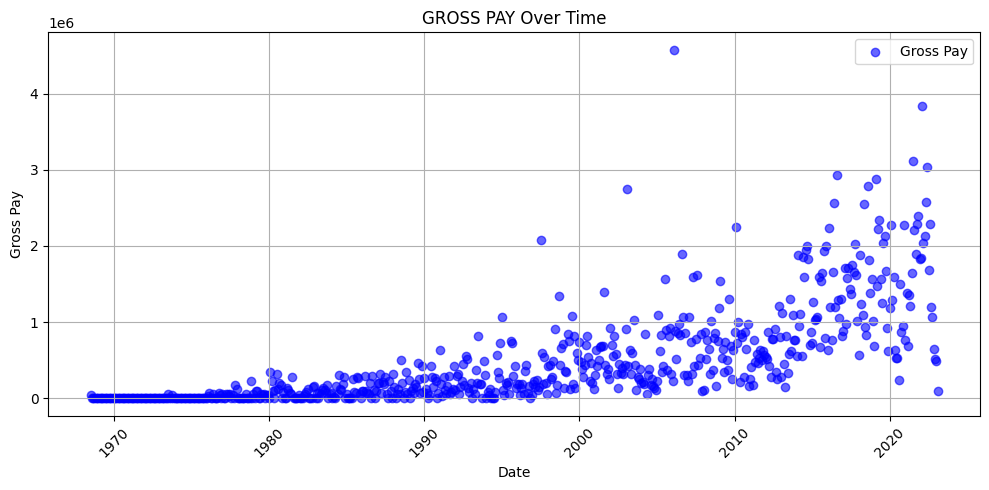

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(ts_data['ds'], ts_data['y'], color='blue', alpha=0.6, label='Gross Pay')
plt.title('GROSS PAYMENTS OF YEARS')
plt.xlabel('Date')
plt.ylabel('Gross Pay')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()